In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import numpy as np

In [4]:
url1 = 'https://drive.google.com/file/d/1WM3RaibRuROENR9YCEXMkZfBdmtiXRKY/view?usp=sharing'
url1 = 'https://drive.google.com/uc?id=' + url1.split('/')[-2]
df1 = pd.read_csv(url1, encoding='utf-8')

**Visualisasi EDA**

In [5]:
# Memuat data dari file CSV
df1 = pd.read_csv(url1, encoding='utf-8')

# Menampilkan informasi singkat tentang data
print(df1.info())

# Menampilkan lima baris pertama dari data
display(df1.head())

# Statistik deskriptif untuk kolom numerik
display(df1.describe())

# Menghitung frekuensi setiap rating
rating_counts = df1['rating'].value_counts()
print(rating_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


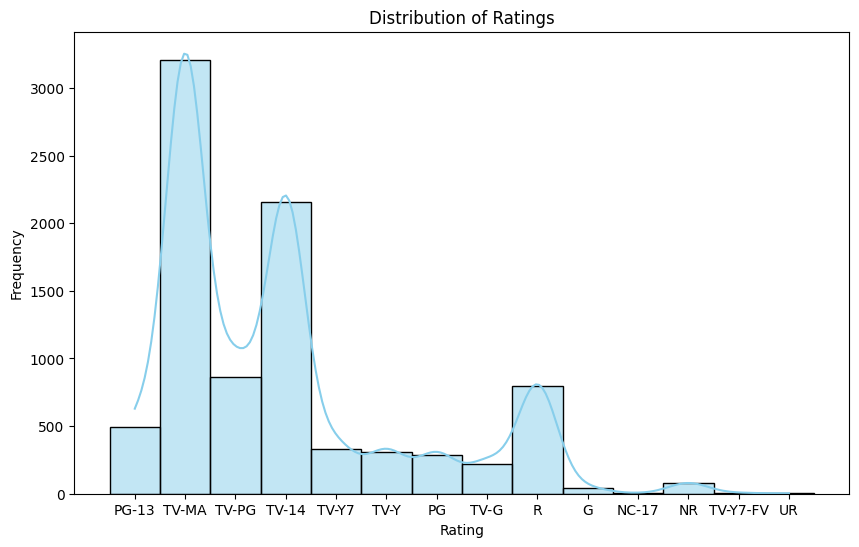

<ipython-input-6-f6f74c70845f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['type'], y=df1['rating'], palette='pastel')


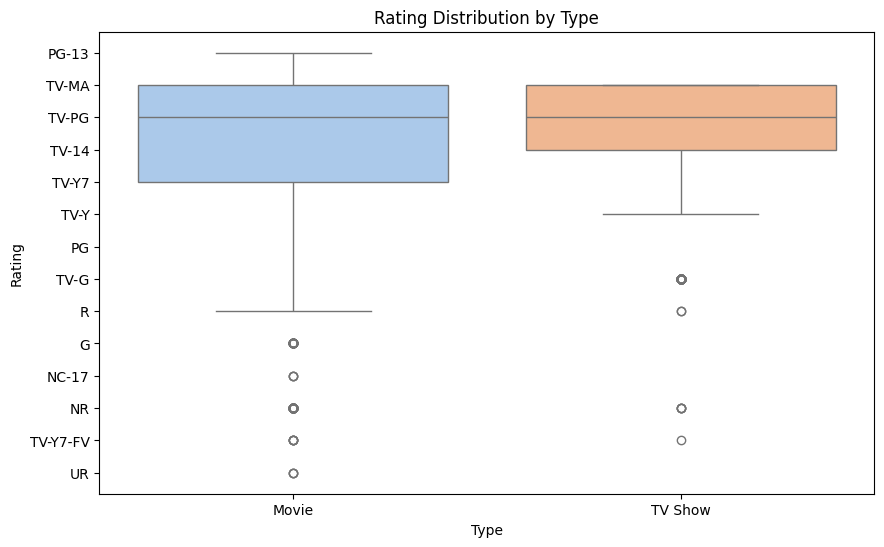

<ipython-input-6-f6f74c70845f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['type'], palette='pastel')


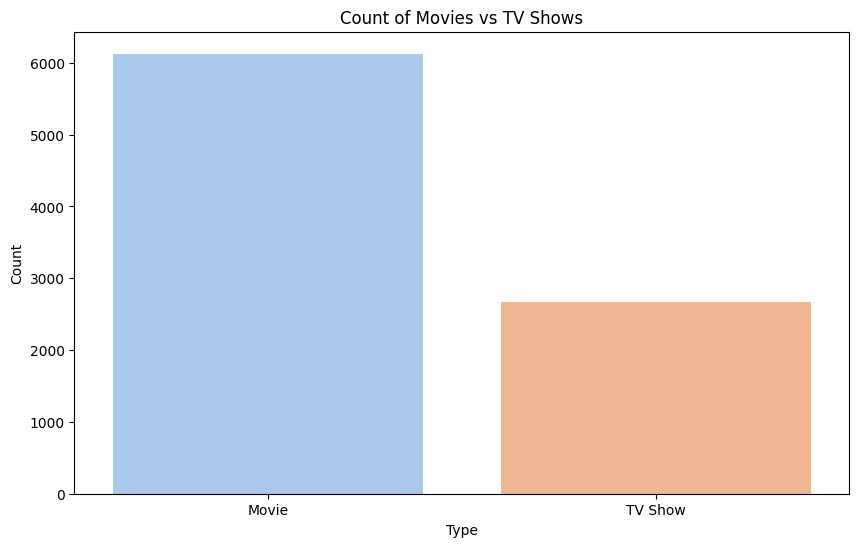

In [6]:
# Visualisasi EDA
# Histogram untuk distribusi variabel numerik
plt.figure(figsize=(10, 6))
sns.histplot(df1['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot untuk melihat distribusi dan outlier pada variabel numerik
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['type'], y=df1['rating'], palette='pastel')
plt.title('Rating Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

# Count plot untuk melihat distribusi kategori pada variabel kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x=df1['type'], palette='pastel')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Perbedaan kepopuleran tv show dan movie sebelum dilakukan pre-processing**

In [7]:
#dataset pertama
df1 = pd.read_csv(url1, encoding='utf-8')

type_counts = df1['type'].value_counts()

print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


**Total jumlah setiap genre**

In [8]:
#memanggil dataset 1
df1 = pd.read_csv(url1, encoding='utf-8')

genres = df1['listed_in'].str.split(', ')

genre_count = {}
for genre_list in genres:
    for genre in genre_list:
        genre = genre.strip()
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Genre Paling Favorit:")
for genre, count in sorted_genres[:10]:
    print(f"{genre}: {count}")

Top 10 Genre Paling Favorit:
International Movies: 2752
Dramas: 2426
Comedies: 1674
International TV Shows: 1349
Documentaries: 869
Action & Adventure: 859
TV Dramas: 762
Independent Movies: 756
Children & Family Movies: 641
Romantic Movies: 616


**Pre-processing**

1. Cleaning

In [9]:
#dataset pertama
df1 = pd.read_csv(url1, encoding='utf-8')

print("Sebelum membersihkan:")
display(df1.head())

dfc1 = df1.drop(columns=['show_id', 'release_year'])

print("\nSetelah membersihkan:")
display(dfc1.head())

Sebelum membersihkan:


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"



Setelah membersihkan:


,type,title,director,country,date_added,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
#memanggil dataset 2
url2 = 'https://drive.google.com/file/d/1iVdSZTzZlVXobPEyP7rC2-j7QyqrXhJw/view?usp=sharing'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
df2 = pd.read_csv(url2, encoding='latin1')

print("Sebelum membersihkan:")
display(df2.head())

dfc2 = df2.drop(columns=['release year', 'ratingLevel', 'rating'])

dfc2.fillna(0, inplace=True)

print("\nSetelah membersihkan dan mengisi nilai kosong:")
display(dfc2.head())
print("Data telah dibersihkan, nilai kosong diisi dengan 0, dan disimpan dalam file netflix2_cleaned.csv")

Sebelum membersihkan:


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80



Setelah membersihkan dan mengisi nilai kosong:


,title,ratingDescription,user rating score,user rating size
0,White Chicks,80,82.0,80
1,Lucky Number Slevin,100,0.0,82
2,Grey's Anatomy,90,98.0,80
3,Prison Break,90,98.0,80
4,How I Met Your Mother,70,94.0,80


Data telah dibersihkan, nilai kosong diisi dengan 0, dan disimpan dalam file netflix2_cleaned.csv


2. Integration

In [11]:
# Display data before merging
print("Data dari dataset 1 yang sudah dicleaning:")
display(dfc1.head())

print("\nData dari dataset 1 yang sudah dicleaning:")
display(dfc2.head())

# Merge the dataframes
dfi = pd.merge(dfc1, dfc2, on='title', how='inner')

# Display data after merging
print("\nHasil integrasi data:")
display(dfi.head())

Data dari dataset 1 yang sudah dicleaning:


,type,title,director,country,date_added,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"



Data dari dataset 1 yang sudah dicleaning:


,title,ratingDescription,user rating score,user rating size
0,White Chicks,80,82.0,80
1,Lucky Number Slevin,100,0.0,82
2,Grey's Anatomy,90,98.0,80
3,Prison Break,90,98.0,80
4,How I Met Your Mother,70,94.0,80



Hasil integrasi data:


,type,title,director,country,date_added,rating,duration,listed_in,ratingDescription,user rating score,user rating size
0,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
1,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
2,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
3,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
4,TV Show,Friday Night Lights,Not Given,Pakistan,8/1/2021,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",70,81.0,80


3. Transformation

In [12]:
# Display data after merging
print("\nData sebelum Transformasi:")
display(dfi.head())

# Membuat kolom 'total_rating' sebagai hasil transformasi
dfi['total_rating'] = (dfi['ratingDescription'] + dfi['user rating score'] + dfi['user rating size']) / 3

# Menyimpan hasil transformasi dalam DataFrame baru (df5)
dft = dfi.copy()

print("\nData setelah transformasi:")
display(dft.head())


Data sebelum Transformasi:


,type,title,director,country,date_added,rating,duration,listed_in,ratingDescription,user rating score,user rating size
0,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
1,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
2,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
3,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80
4,TV Show,Friday Night Lights,Not Given,Pakistan,8/1/2021,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",70,81.0,80



Data setelah transformasi:


,type,title,director,country,date_added,rating,duration,listed_in,ratingDescription,user rating score,user rating size,total_rating
0,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80,81.333333
1,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80,81.333333
2,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80,81.333333
3,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,TV-14,9 Seasons,"British TV Shows, Reality TV",70,94.0,80,81.333333
4,TV Show,Friday Night Lights,Not Given,Pakistan,8/1/2021,TV-14,5 Seasons,"TV Dramas, Teen TV Shows",70,81.0,80,77.000000


4. Feature Selection

      a. Perbedaan kepopuleran tv show dan movie setelah di pre-processing menggunakan rating

In [13]:
# Memeriksa kolom yang tersedia
print("Kolom yang tersedia dalam data:", dft.columns)

# Memastikan kolom 'total_rating' ada dalam data
if 'total_rating' not in dft.columns:
    raise KeyError("Kolom 'total_rating' tidak ditemukan dalam data.")

# Memisahkan data TV Show dan Movie
tv_shows = dft[dft['type'] == 'TV Show']
movies = dft[dft['type'] == 'Movie']

# Menghitung total rating untuk TV Show dan Movie
total_rating_tv_show = tv_shows['total_rating'].sum()
total_rating_movie = movies['total_rating'].sum()

print("Total rating untuk TV Show:", total_rating_tv_show)
print("Total rating untuk Movie:", total_rating_movie)

# Menentukan jenis yang paling populer
jenis_paling_populer = "TV Show" if total_rating_tv_show > total_rating_movie else "Movie"
print("Jenis yang paling populer di Netflix adalah:", jenis_paling_populer)

Kolom yang tersedia dalam data: Index(['type', 'title', 'director', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'ratingDescription', 'user rating score',
       'user rating size', 'total_rating'],
      dtype='object')
Total rating untuk TV Show: 28007.0
Total rating untuk Movie: 8457.333333333332
Jenis yang paling populer di Netflix adalah: TV Show


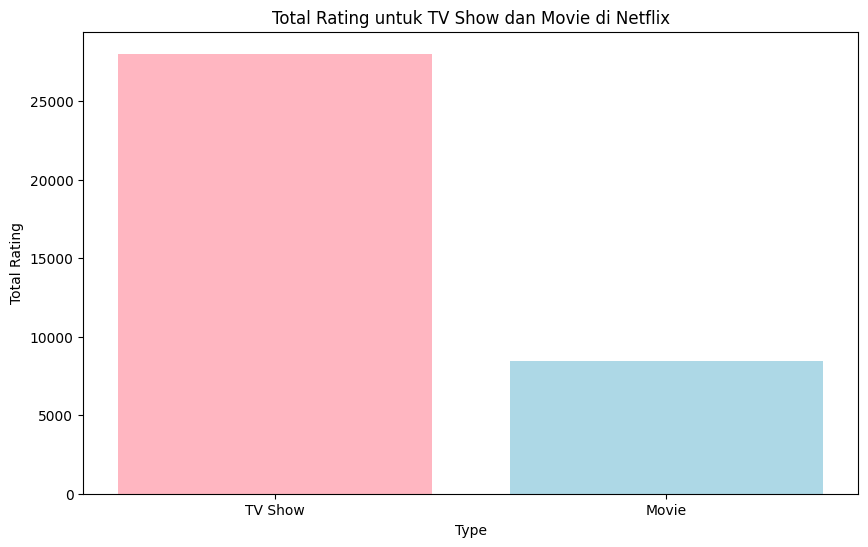

In [14]:
# Visualisasi data menggunakan matplotlib
labels = ['TV Show', 'Movie']
ratings = [total_rating_tv_show, total_rating_movie]

plt.figure(figsize=(10, 6))
plt.bar(labels, ratings, color=['#FFB6C1', '#ADD8E6'])  # Pink pastel dan biru pastel
plt.xlabel('Type')
plt.ylabel('Total Rating')
plt.title('Total Rating untuk TV Show dan Movie di Netflix')
plt.show()

      b. Top 10 genre terfavorit di Netflix

In [15]:
#dataset pertama
df1 = pd.read_csv(url1, encoding='utf-8')

genres = df1['listed_in'].str.split(', ')

genre_count = {}
for genre_list in genres:
    for genre in genre_list:
        genre = genre.strip()
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

top_10_genres = sorted_genres[:10]
table = tabulate(top_10_genres, headers=['Genre', 'Count'], tablefmt='plain')

print("Top 10 Genre Paling Favorit:")
print(table)

Top 10 Genre Paling Favorit:
Genre                       Count
International Movies         2752
Dramas                       2426
Comedies                     1674
International TV Shows       1349
Documentaries                 869
Action & Adventure            859
TV Dramas                     762
Independent Movies            756
Children & Family Movies      641
Romantic Movies               616


**Mechine Learning**

1. Metode Kmeans



=== Cluster 1 ===
Voltron: Legendary Defender - Type: TV Show, Duration: 8 Seasons, Total Rating: 41.333333333333336

=== Cluster 2 ===
Slam - Type: Movie, Duration: 99 min, Total Rating: 64.0

=== Cluster 3 ===
American Horror Story - Type: TV Show, Duration: 9 Seasons, Total Rating: 93.33333333333333

=== Cluster 4 ===
Mean Girls 2 - Type: Movie, Duration: 98 min, Total Rating: 54.0

=== Cluster 5 ===
Dragons: Race to the Edge - Type: TV Show, Duration: 6 Seasons, Total Rating: 70.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


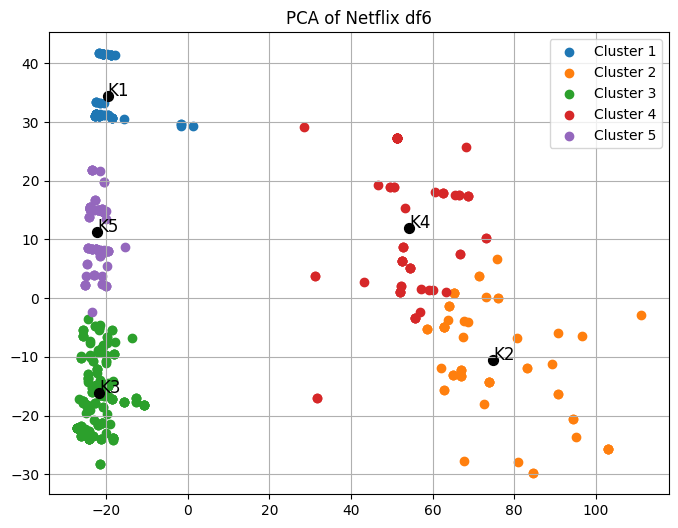


Jadi, Cluster mana yang lebih akurat? Cluster 3 lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.


In [16]:
# Menyiapkan fitur-fitur yang diperlukan
features = dft[['type', 'duration', 'total_rating']].copy()

# Mengubah tipe df6 'duration' menjadi angka (menit)
features['duration'] = features['duration'].str.extract('(\d+)').astype(float)

# Menggunakan Label Encoding untuk 'type'
features['type'] = features['type'].map({'TV Show': 0, 'Movie': 1})

# Melakukan k-means clustering dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features)

# Menambahkan hasil clustering ke dalam df6frame
dft['cluster'] = clusters

# Analisis setiap cluster
for cluster_id in range(5):  # Update range to include the fifth cluster
    print(f"\n=== Cluster {cluster_id+1} ===")
    cluster_df6 = dft[dft['cluster'] == cluster_id]
    popular_content = cluster_df6.sort_values(by=['type', 'duration', 'total_rating'], ascending=False).iloc[0]
    print(f"{popular_content['title']} - Type: {popular_content['type']}, Duration: {popular_content['duration']}, Total Rating: {popular_content['total_rating']}")

# Menambahkan PCA untuk reduksi dimensi dan splitting df6
X = features.values
y = clusters

# Melakukan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Splitting df6
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Visualisasi hasil PCA dengan scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in range(5):  # Update to include the fifth cluster
    plt.scatter(X_pca[y == cluster_id, 0], X_pca[y == cluster_id, 1], label=f'Cluster {cluster_id+1}')

# Menemukan centroid dari setiap cluster
centroids = kmeans.cluster_centers_
centroid_pca = pca.transform(centroids)

# Menambahkan label pada centroid dan bulatan tepi
for i, txt in enumerate(['K1', 'K2', 'K3', 'K4', 'K5']):  # Update labels for centroids
    plt.annotate(txt, (centroid_pca[i, 0], centroid_pca[i, 1]), fontsize=12, color='black')
    plt.scatter(centroid_pca[i, 0], centroid_pca[i, 1], s=50, edgecolors='black', facecolors='black')

plt.title('PCA of Netflix df6')
plt.legend()
plt.grid(True)
plt.show()

# Mencari nilai rata-rata total rating untuk setiap cluster
average_rating_per_cluster = dft.groupby('cluster')['total_rating'].mean()

# Memilih cluster dengan nilai rata-rata total rating tertinggi sebagai konten paling populer
most_popular_cluster = average_rating_per_cluster.idxmax()
print(f"\nJadi, Cluster mana yang lebih akurat? Cluster {most_popular_cluster+1} lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.")

Uji validasi K-means

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_values = silhouette_samples(features, clusters)

dft['silhouette'] = silhouette_values

average_silhouette_per_cluster = dft.groupby('cluster')['silhouette'].mean()

for cluster_id in range(5):
    print(f"Cluster {cluster_id+1}: Average Silhouette Score = {average_silhouette_per_cluster[cluster_id]:.4f}")

overall_silhouette_score = silhouette_score(features, clusters)
print(f"\nOverall Silhouette Score = {overall_silhouette_score:.4f}")

Cluster 1: Average Silhouette Score = 0.6870
Cluster 2: Average Silhouette Score = 0.3724
Cluster 3: Average Silhouette Score = 0.6763
Cluster 4: Average Silhouette Score = 0.4349
Cluster 5: Average Silhouette Score = 0.6574

Overall Silhouette Score = 0.6059


2. Metode Hierarki


=== Cluster 1 ===
Slam - Type: Movie, Duration: 99 min, Total Rating: 64.0

=== Cluster 2 ===
Dragons: Race to the Edge - Type: TV Show, Duration: 6 Seasons, Total Rating: 70.0

=== Cluster 3 ===
American Horror Story - Type: TV Show, Duration: 9 Seasons, Total Rating: 93.33333333333333

=== Cluster 4 ===
Pandora - Type: Movie, Duration: 137 min, Total Rating: 64.0

=== Cluster 5 ===
Voltron: Legendary Defender - Type: TV Show, Duration: 8 Seasons, Total Rating: 41.333333333333336


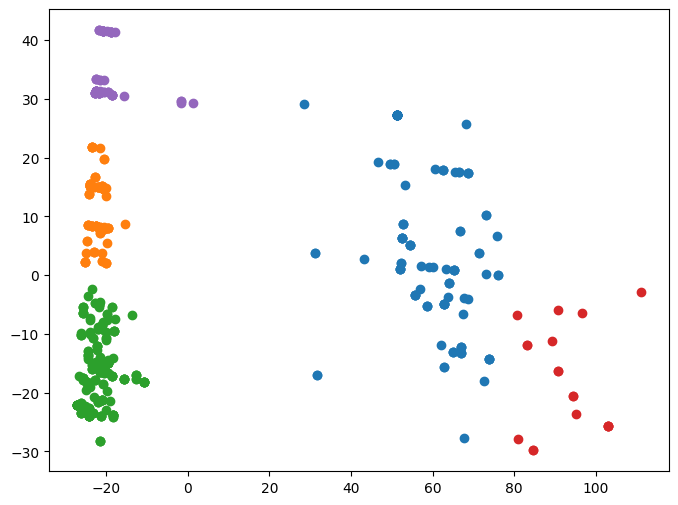

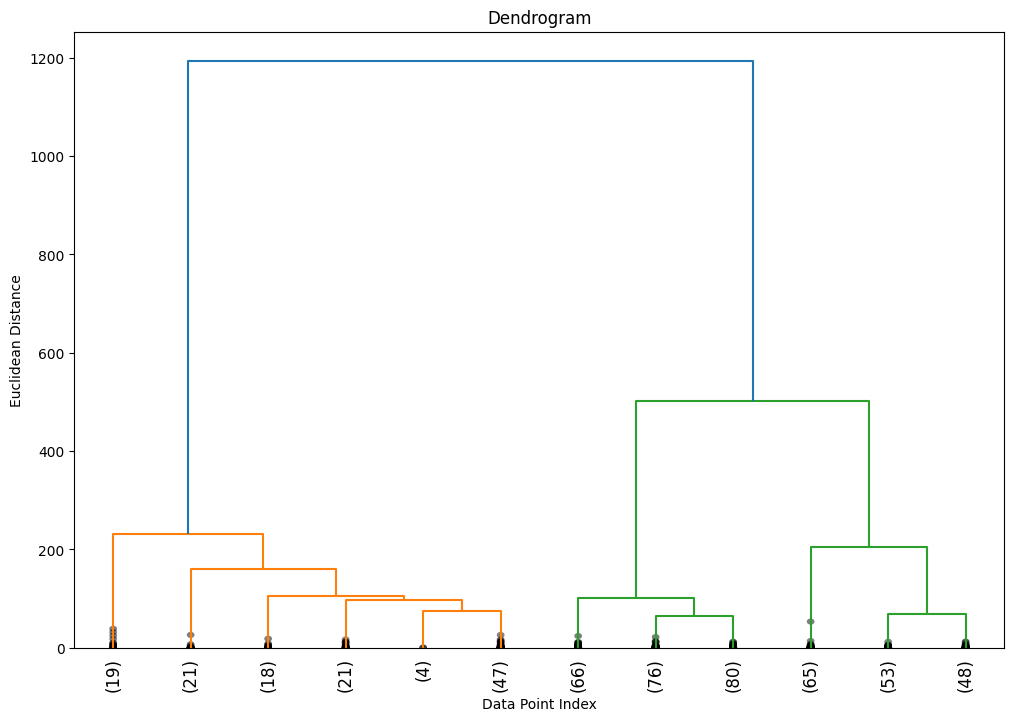


Jadi, Cluster mana yang lebih akurat? Cluster 3 lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.


In [18]:
# Menyiapkan fitur-fitur yang diperlukan
features = dft[['type', 'duration', 'total_rating']].copy()

# Mengubah tipe data 'duration' menjadi angka (menit)
features['duration'] = features['duration'].str.extract('(\d+)').astype(float)

# Menggunakan Label Encoding untuk 'type'
features['type'] = features['type'].map({'TV Show': 0, 'Movie': 1})

# Melakukan hierarchical clustering dengan 5 cluster
agg_cluster = AgglomerativeClustering(n_clusters=5)
clusters = agg_cluster.fit_predict(features)

# Menambahkan hasil clustering ke dalam dataframe
dft['cluster'] = clusters

# Analisis setiap cluster
for cluster_id in range(5):  # Update range to include the fifth cluster
    print(f"\n=== Cluster {cluster_id+1} ===")
    cluster_data = dft[dft['cluster'] == cluster_id]
    popular_content = cluster_data.sort_values(by=['type', 'duration', 'total_rating'], ascending=False).iloc[0]
    print(f"{popular_content['title']} - Type: {popular_content['type']}, Duration: {popular_content['duration']}, Total Rating: {popular_content['total_rating']}")

# Menambahkan PCA untuk reduksi dimensi dan splitting data
X = features.values
y = clusters

# Melakukan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Visualisasi hasil PCA dengan scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in range(5):  # Update to include the fifth cluster
    plt.scatter(X_pca[y == cluster_id, 0], X_pca[y == cluster_id, 1], label=f'Cluster {cluster_id+1}')

# Menemukan dendrogram dari data
Z = linkage(X, method='ward')

# Menampilkan dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Mencari nilai rata-rata total rating untuk setiap cluster
average_rating_per_cluster = dft.groupby('cluster')['total_rating'].mean()

# Memilih cluster dengan nilai rata-rata total rating tertinggi sebagai konten paling populer
most_popular_cluster = average_rating_per_cluster.idxmax()
print(f"\nJadi, Cluster mana yang lebih akurat? Cluster {most_popular_cluster+1} lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.")


Uji Validasi Hierarki

In [19]:
# Uji validasi menggunakan Silhouette Score
silhouette_avg = silhouette_score(features, clusters)
silhouette_values = silhouette_samples(features, clusters)

print("\nSilhouette Scores per Cluster:")
for cluster_id in range(5):
    cluster_silhouette_values = silhouette_values[clusters == cluster_id]
    avg_silhouette_score = cluster_silhouette_values.mean()
    print(f"Cluster {cluster_id+1}: Average Silhouette Score = {avg_silhouette_score:.4f}")

print(f"\nOverall Silhouette Score = {silhouette_avg:.4f}")


Silhouette Scores per Cluster:
Cluster 1: Average Silhouette Score = 0.4707
Cluster 2: Average Silhouette Score = 0.6669
Cluster 3: Average Silhouette Score = 0.6741
Cluster 4: Average Silhouette Score = 0.6169
Cluster 5: Average Silhouette Score = 0.6852

Overall Silhouette Score = 0.6284


3. DBSCAN

DBSCAN dengan eps=1.0 dan min_samples=15 menghasilkan 5 cluster.

=== Cluster 1 ===
The Deep - Type: TV Show, Duration: 3 Seasons, Total Rating: 41.0

=== Cluster 2 ===
The Seven Deadly Sins - Type: TV Show, Duration: 5 Seasons, Total Rating: 57.333333333333336

=== Cluster 3 ===
The Vampire Diaries - Type: TV Show, Duration: 8 Seasons, Total Rating: 87.0

=== Cluster 4 ===
Octonauts - Type: TV Show, Duration: 4 Seasons, Total Rating: 30.666666666666668

=== Cluster 5 ===
Master of None - Type: TV Show, Duration: 3 Seasons, Total Rating: 64.0


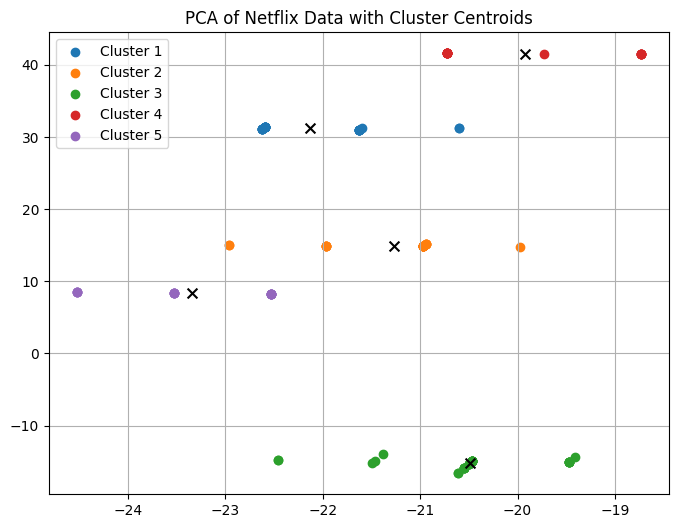


Jadi, Cluster mana yang lebih akurat? Cluster 3 lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.


In [20]:
# Menyiapkan fitur-fitur yang diperlukan
features = dft[['type', 'duration', 'total_rating']].copy()

# Mengubah tipe data 'duration' menjadi angka (menit)
features['duration'] = features['duration'].str.extract('(\d+)').astype(float)

# Menggunakan Label Encoding untuk 'type'
features['type'] = features['type'].map({'TV Show': 0, 'Movie': 1})

# Melakukan DBSCAN clustering dengan mencoba beberapa nilai epsilon dan min_samples
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]  # Nilai epsilon yang akan dicoba
min_samples_values = [5, 10, 15, 20]    # Nilai min_samples yang akan dicoba
best_clusters = None
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Menghitung jumlah cluster, mengabaikan noise (-1)
        if n_clusters == 5:  # Jika jumlah cluster adalah 5, kita simpan hasilnya
            best_clusters = clusters
            best_eps = eps
            best_min_samples = min_samples
            break
    if best_clusters is not None:
        break

# Jika tidak ada kombinasi eps dan min_samples yang menghasilkan 5 cluster, gunakan yang terbaik yang ada
if best_clusters is None:
    print("Tidak dapat menemukan konfigurasi DBSCAN yang menghasilkan 5 cluster.")
else:
    print(f"DBSCAN dengan eps={best_eps} dan min_samples={best_min_samples} menghasilkan 5 cluster.")

# Menambahkan hasil clustering ke dalam dataframe
dft['cluster'] = best_clusters

# Analisis setiap cluster
for cluster_id in range(5):  # Update range to include the fifth cluster
    print(f"\n=== Cluster {cluster_id+1} ===")
    cluster_data = dft[dft['cluster'] == cluster_id]
    popular_content = cluster_data.sort_values(by=['type', 'duration', 'total_rating'], ascending=False).iloc[0]
    print(f"{popular_content['title']} - Type: {popular_content['type']}, Duration: {popular_content['duration']}, Total Rating: {popular_content['total_rating']}")

# Menambahkan PCA untuk reduksi dimensi dan splitting data
X = features.values
y = best_clusters

# Melakukan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Visualisasi hasil PCA dengan scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in range(5):  # Update to include the fifth cluster
    plt.scatter(X_pca[y == cluster_id, 0], X_pca[y == cluster_id, 1], label=f'Cluster {cluster_id+1}')

# Calculate and plot centroids
for cluster_id in range(5):
    cluster_points = X_pca[y == cluster_id]
    centroid = cluster_points.mean(axis=0)
    plt.scatter(centroid[0], centroid[1], marker='x', s=50, c='black')

plt.title('PCA of Netflix Data with Cluster Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Mencari nilai rata-rata total rating untuk setiap cluster
average_rating_per_cluster = dft.groupby('cluster')['total_rating'].mean()

# Memilih cluster dengan nilai rata-rata total rating tertinggi sebagai konten paling populer
most_popular_cluster = average_rating_per_cluster.idxmax()
print(f"\nJadi, Cluster mana yang lebih akurat? Cluster {most_popular_cluster+1} lebih akurat untuk dikatakan sebagai konten paling populer di Netflix.")


Uji Validasi BDSCAN

In [21]:
# Menghitung dan menampilkan Silhouette Score
silhouette_values = silhouette_samples(features, clusters)
dft['silhouette'] = silhouette_values
average_silhouette_per_cluster = dft.groupby('cluster')['silhouette'].mean()

for cluster_id in range(5):
    print(f"Cluster {cluster_id+1}: Average Silhouette Score = {average_silhouette_per_cluster[cluster_id]:.4f}")

overall_silhouette_score = silhouette_score(features, clusters)
print(f"\nOverall Silhouette Score = {overall_silhouette_score:.4f}")

Cluster 1: Average Silhouette Score = 0.9306
Cluster 2: Average Silhouette Score = 0.8994
Cluster 3: Average Silhouette Score = 0.9532
Cluster 4: Average Silhouette Score = 0.9040
Cluster 5: Average Silhouette Score = 0.8676

Overall Silhouette Score = -0.1934


**Balancing**

In [22]:

# Menyiapkan fitur-fitur yang diperlukan
features = dft[['type', 'duration', 'total_rating']].copy()

# Mengubah tipe data 'duration' menjadi angka (menit)
features['duration'] = features['duration'].str.extract('(\d+)').astype(float)

# Menggunakan Label Encoding untuk 'type'
features['type'] = features['type'].map({'TV Show': 0, 'Movie': 1})

# Melakukan k-means clustering dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features)

# Menambahkan hasil clustering ke dalam dataframe
dft['cluster'] = clusters

# Undersampling, Oversampling, dan Resampling menggunakan SMOTE
undersampler = RandomUnderSampler(random_state=42)
oversampler = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

original_counts = dft['cluster'].value_counts().sort_index()
undersampled_counts = []
oversampled_counts = []
smote_resampled_counts = []

for cluster_id in range(5):
    cluster_data = dft[dft['cluster'] == cluster_id]

    # Check if there's only one unique class in the cluster
    unique_classes = cluster_data['cluster'].nunique()

    # If there's only one unique class, skip undersampling
    if unique_classes == 1:
        undersampled_counts.append(len(cluster_data))
        oversampled_counts.append(len(cluster_data))
        smote_resampled_counts.append(len(cluster_data))
        continue

    # Undersampling
    X_under, y_under = undersampler.fit_resample(cluster_data.drop('cluster', axis=1), cluster_data['cluster'])
    undersampled_counts.append(len(X_under))

    # Oversampling
    X_over, y_over = oversampler.fit_resample(cluster_data.drop('cluster', axis=1), cluster_data['cluster'])
    oversampled_counts.append(len(X_over))

    # SMOTE resampling
    X_smote, y_smote = smote.fit_resample(cluster_data.drop('cluster', axis=1), cluster_data['cluster'])
    smote_resampled_counts.append(len(X_smote))



# Menampilkan hasil balancing untuk setiap cluster
balance_result = pd.DataFrame({
    'Cluster': range(1, 6),  # Mengatur ulang indeks cluster agar dimulai dari 1
    'Original': original_counts.values,
    'Undersampled': undersampled_counts,
    'Oversampled': oversampled_counts,
    'SMOTE resampled': smote_resampled_counts
})
balance_result.index.name = 'Index'  # Memberi nama pada indeks
print(balance_result.reset_index().to_string(index=False))

 Index  Cluster  Original  Undersampled  Oversampled  SMOTE resampled
     0        1        65            65           65               65
     1        2        62            62           62               62
     2        3       221           221          221              221
     3        4        68            68           68               68
     4        5       102           102          102              102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualisasi **Perbandingan**

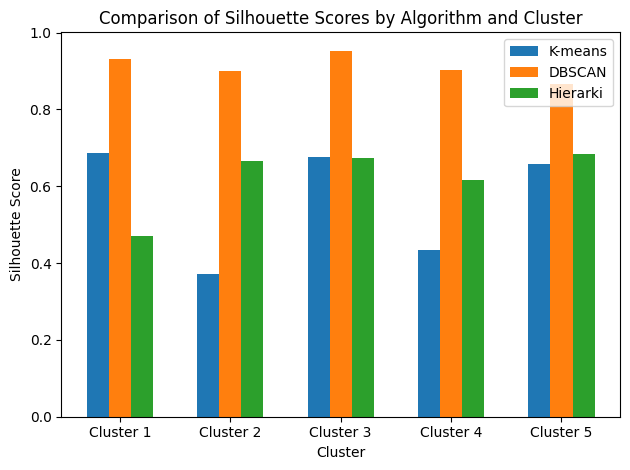

In [23]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
k_means_scores = [0.6870, 0.3724, 0.6763, 0.4349, 0.6574]
dbscan_scores = [0.9306, 0.8994, 0.9532, 0.9040, 0.8676]
hierarki_scores = [0.4707, 0.6669, 0.6741, 0.6169, 0.6852]

x = np.arange(len(clusters))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, k_means_scores, width, label='K-means')
rects2 = ax.bar(x, dbscan_scores, width, label='DBSCAN')
rects3 = ax.bar(x + width, hierarki_scores, width, label='Hierarki')

ax.set_xlabel('Cluster')
ax.set_ylabel('Silhouette Score')
ax.set_title('Comparison of Silhouette Scores by Algorithm and Cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

fig.tight_layout()
plt.show()


**Outlier**

**Outliers K-means**

Outliers:


,type,duration,total_rating
9,1,85.0,70.666667
10,1,85.0,70.666667
11,1,85.0,70.666667
14,1,122.0,83.000000
15,1,122.0,83.000000
27,1,118.0,79.000000
28,1,118.0,79.000000
33,1,98.0,54.000000
34,1,98.0,54.000000
46,1,59.0,84.666667


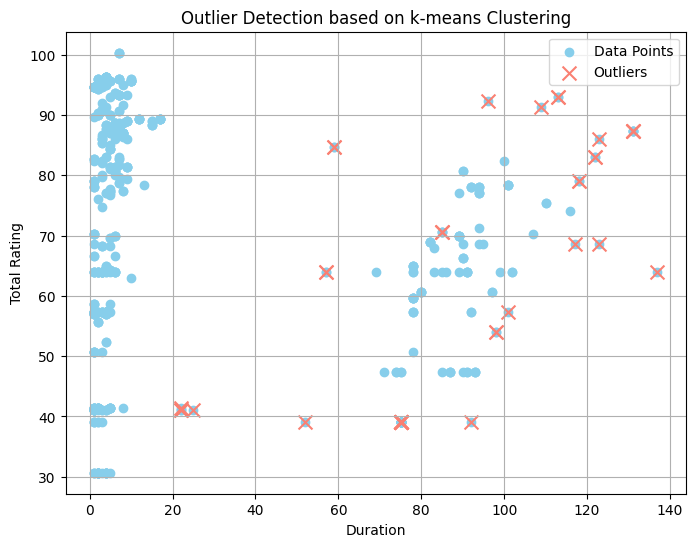

In [24]:
# Hitung jarak setiap titik data ke centroid klaster
distances = kmeans.transform(features)

# Ambil jarak terdekat dari setiap titik data ke centroid
nearest_distances = distances.min(axis=1)

# Tentukan batas atas untuk jarak
outlier_threshold = 2 * nearest_distances.mean()

# Tentukan outlier berdasarkan batas atas
outliers = features[nearest_distances > outlier_threshold]

print("Outliers:")
display(outliers)

# Visualisasi data dengan menyoroti outlier
plt.figure(figsize=(8, 6))
plt.scatter(features['duration'], features['total_rating'], c='skyblue', label='Data Points')
plt.scatter(outliers['duration'], outliers['total_rating'], c='salmon', label='Outliers', marker='x', s=100)
plt.xlabel('Duration')
plt.ylabel('Total Rating')
plt.title('Outlier Detection based on k-means Clustering')
plt.legend()
plt.grid(True)
plt.show()


**Outliers DBSCAN**

DBSCAN dengan eps=1.0 dan min_samples=15 menghasilkan 5 cluster.


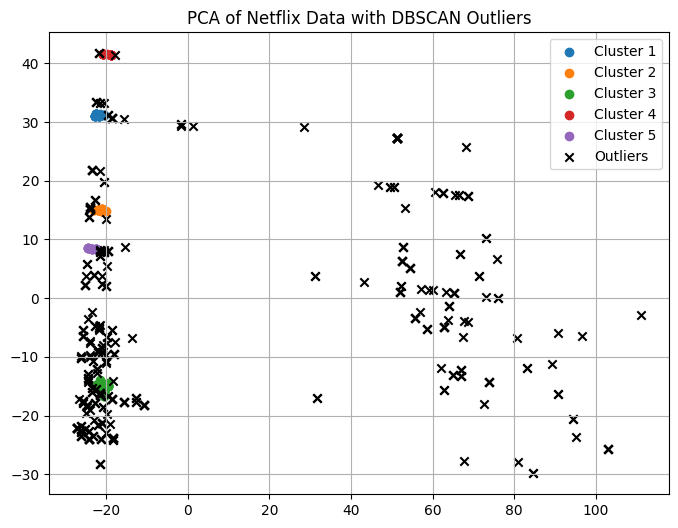

In [25]:
# Prepare the features
features = dft[['type', 'duration', 'total_rating']].copy()

# Convert 'duration' to numeric
features['duration'] = features['duration'].str.extract('(\d+)').astype(float)

# Label Encoding for 'type'
features['type'] = features['type'].map({'TV Show': 0, 'Movie': 1})

# Perform DBSCAN clustering
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]
best_clusters = None
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters == 5:
            best_clusters = clusters
            best_eps = eps
            best_min_samples = min_samples
            break
    if best_clusters is not None:
        break

if best_clusters is None:
    print("Tidak dapat menemukan konfigurasi DBSCAN yang menghasilkan 5 cluster.")
else:
    print(f"DBSCAN dengan eps={best_eps} dan min_samples={best_min_samples} menghasilkan 5 cluster.")

dft['cluster'] = best_clusters



# Perform PCA for dimensionality reduction
X = features.values
y = best_clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Visualize PCA results
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(X_pca[y == cluster_id, 0], X_pca[y == cluster_id, 1], label=f'Cluster {cluster_id+1}')

# Highlight outliers
outliers = X_pca[y == -1]
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers')

plt.title('PCA of Netflix Data with DBSCAN Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Find the average total rating per cluster
average_rating_per_cluster = dft.groupby('cluster')['total_rating'].mean()

